<a href="https://colab.research.google.com/github/001292420/hds5210-2023/blob/main/final/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Background
## Vision and Eye Health Surveillance System (VEHSS)
CDC’s Vision Health Initiative (VHI) and NORC at the University of Chicago partnered to develop the National Vision and Eye Health Surveillance System (VEHSS). VEHSS leverages new and existing data sources to help health professionals, researchers, policy makers, and patients understand the scope of vision loss, eye disorders, and eye care services in the United States. VEHSS is intended to grow and improve over time based on input and needs of the vision health community.

The goals of the system are to:

- Identify and collect existing sources of information on vision and eye health.
- Create case definitions to analyze data consistently.

- Analyze data to estimate:
  - The prevalence of eye disorders and disabilities.
  - The use of eye-health services.
  - Health disparities in visual health treatment and outcomes.
- Develop composite prevalence estimates of vision loss and major eye diseases by combining information from multiple different data sources in order to create more comprehensive estimates.
- Disseminate the information developed by the system to key stakeholders, and respond to feedback to continually improve the quality and usefulness of the system.

# Objective
My objective for this project is to augment Vision and Eye Health Surveillance System (VEHSS) to produce report based on custom input by the user. I will combine other data from other resources, compare them and report the disease specific statistical finding.

In this tool user can check the proportion of categories in any categorical variables. For example what proportion of data are males and what proportion of data are females.

They can check the eye disease prevalence estimate for different categories of categorical variables. User can also check the pivot table of disease prevalence for two different categorical variables.

Further I am adding external eye disease data source so that user could be able to do diseae specific analysis also. They can check proportions of categories of categorical variables for specified disease. This can help the user to know which categories are highly related with that disease condition.

This tool can be useful for policy researcher, healthcare professional while exploring VEHSS data to find hidden pattern inside the data.

# Methodology
1. I will load the required data from CDC website from VEHSS database.
2. I will use Socrata Open Data API from sodapy python package to access the data.
3. Then I will do the preliminary exploratory data analysis to get an idea of the data set.
4. After that I will create functions to explore the proportion of categories of categorical variables which will followed by more functions. Function for prevalence estimate for categorical variables. Function for pivot table.
5. Later I will combine all the previous function and create a new parent function to take user input, apply logic and then perform analysis. This will be the final tool which user can use to explore the VEHSS data.
6. At last I will load the glucoma data. Extract disease specific data from the VEHSS databse. Pre-process them to bring in same format. Then merge them. Then create a function to analyse disease specific categorical pattern.

# Data sources
- Centers for disease control and prevention (https://www.cdc.gov/visionhealth/vehss/project/index.html)
- HealthData.gov (https://healthdata.gov/dataset/VEHSS-Composite-Prevalence-Estimates/2bc8-bmi8/about_data)
- Glaucoma Detection Dataset (https://github.com/incribo-inc/glaucoma_detection_dataset)

10,000 records of glaucoma detection dataset

# Note
- If time out error occur, it tells data could not be loaded and we should try to load it again.
- By default API allows to fetch 1000 dta poins. So I using limit=10000 to 100000 sometimes to fetach large number of data points. This helps to get a better estimate.

# Required libraries
In the below section I have loaded the required libraries which is used in this project.
- *pandas* for data manipulation
- *numpy* for numerical calculation
- *matplotlib* for plots
- *sodapy*: Python library for the Socrata Open Data API

In [1]:
# Lets load the required libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# uncomment and install these libraries
!pip install sodapy
# loading socrata from sodapy
from sodapy import Socrata

# Data extraction from data.cdc.gov
In this section I will use API to extract custom data from the data.cdc.gov website. data.cdc.gov hosts data from many field. A huge data of VEHSS is also contained here. I will use conncection of this API along with custom SQL query to extract the required data.

In [2]:
# lets initiate the connection to the database
# here we need to provide website link, api key, username and password to initiate the connection
# here I am providing website link where database is hosted, API key, my user id and password
client = Socrata('data.cdc.gov',
                  '1HVRZjRxpLiF90ERG5n2sTsPv',
                  username="Sahithi.kalapala@slu.edu",
                  password="SahitiSlu1")

# lets load a sample data
# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
df_samp_json = client.get("qeru-k2y2", limit=2000)

# Convert to pandas DataFrame
df_samp = pd.DataFrame.from_records(df_samp_json)

In [3]:
# columns in the data
df_samp.columns

Index(['yearstart', 'yearend', 'locationabbr', 'locationdesc', 'datasource',
       'topic', 'category', 'question', 'response', 'age', 'gender',
       'raceethnicity', 'riskfactor', 'riskfactorresponse', 'data_value_unit',
       'data_value_type', 'data_value', 'low_confidence_limit',
       'high_confidence_limit', 'numerator', 'sample_size', 'locationid',
       'topicid', 'categoryid', 'questionid', 'responseid', 'datavaluetypeid',
       'ageid', 'genderid', 'raceethnicityid', 'riskfactorid',
       'riskfactorresponseid', 'geolocation', 'geographiclevel'],
      dtype='object')

The data contains above columns. The details of the columns are as follows:-
- yearstart: The starting year of the data collection period.
- yearend: The ending year of the data collection period.
- locationabbr: Abbreviated code for the location (e.g., US for United States).
- locationdesc: Full description of the location (e.g., United States).
- geolocation: Geographical coordinates of the location.
- geographiclevel: Level of geographical detail (e.g., national, state, county).
- locationid: Unique identifier for the location.
- datasource: Source of the data (e.g., survey, administrative data).
- topic: Broad area of focus for the survey question (e.g., vision, eye care).
- category: Subcategory within the topic (e.g., vision impairment, access to eye care).
- response: Possible answer choices for the survey question.
- age: Age group of the respondents.
- gender: Gender of the respondents.
- raceethnicity: Race and ethnicity of the respondents.
- riskfactor: Whether the respondents have a specific risk factor for vision problems.
- riskfactorresponse: Specific risk factor category (e.g., diabetes, smoking).
data_value_unit: Unit of measurement for the data value (e.g., percentage, prevalence).
- data_value_type: Type of data value (e.g., continuous, categorical).
- data_value: Actual value of the data.
- low_confidence_limit: Lower bound of the confidence interval for the data value.
- high_confidence_limit: Upper bound of the confidence interval for the data value.
- numerator: Number of respondents with the specific response.
- sample_size: Total number of respondents in the study.

Below columns are unique identifiers:
- topicid: Unique identifier for the topic.
- categoryid: Unique identifier for the category.
- questionid: Unique identifier for the question.
- responseid: Unique identifier for the response.
- datavaluetypeid: Unique identifier for the data value type.
- ageid: Unique identifier for the age group.
- genderid: Unique identifier for the gender.
- raceethnicityid: Unique identifier for the race/ethnicity group.
- riskfactorid: Unique identifier for the risk factor.
- riskfactorresponseid: Unique identifier for the risk factor response.

Now lets check the few top rows of the data

In [4]:
# head of the data
print(df_samp.head())

  yearstart yearend locationabbr      locationdesc           datasource  \
0      2021    2021    Abbeville  Abbeville County  Prevalence Estimate   
1      2021    2021    Abbeville  Abbeville County  Prevalence Estimate   
2      2021    2021    Abbeville  Abbeville County  Prevalence Estimate   
3      2021    2021    Abbeville  Abbeville County  Prevalence Estimate   
4      2021    2021    Abbeville  Abbeville County  Prevalence Estimate   

                   topic               category  \
0  Eye Health Conditions  Diabetic Eye Diseases   
1  Eye Health Conditions  Diabetic Eye Diseases   
2  Eye Health Conditions  Diabetic Eye Diseases   
3  Eye Health Conditions  Diabetic Eye Diseases   
4  Eye Health Conditions  Diabetic Eye Diseases   

                                            question  \
0  Prevalence of Diabetic Retinopathy, by detaile...   
1                 Prevalence of Diabetic Retinopathy   
2                 Prevalence of Diabetic Retinopathy   
3  Prevalence of D

We can see those id column are reducdant (alternative columns to them are already present in the data) so we can remove them from the data.

In [5]:
# List of unique identifier columns
unique_identifiers = [
    "topicid",
    "categoryid",
    "questionid",
    "responseid",
    "datavaluetypeid",
    "ageid",
    "genderid",
    "raceethnicityid",
    "riskfactorid",
    "riskfactorresponseid",
    'locationdesc',
    'data_value_unit',
    'locationid'
]

# removing the unique identifier columns
df_samp.drop(columns=unique_identifiers, inplace=True)

In [6]:
# lets check the columns of the reduced data
print(df_samp.columns)

Index(['yearstart', 'yearend', 'locationabbr', 'datasource', 'topic',
       'category', 'question', 'response', 'age', 'gender', 'raceethnicity',
       'riskfactor', 'riskfactorresponse', 'data_value_type', 'data_value',
       'low_confidence_limit', 'high_confidence_limit', 'numerator',
       'sample_size', 'geolocation', 'geographiclevel'],
      dtype='object')


The unique identifier columns are removed. now lets check the data types of the remaining data,

In [7]:
# data types of the column
df_samp.dtypes

yearstart                object
yearend                  object
locationabbr             object
datasource               object
topic                    object
category                 object
question                 object
response                 object
age                      object
gender                   object
raceethnicity            object
riskfactor               object
riskfactorresponse       object
data_value_type          object
data_value               object
low_confidence_limit     object
high_confidence_limit    object
numerator                object
sample_size              object
geolocation              object
geographiclevel          object
dtype: object

Here we see that all the columns are in object type. So before starting with our analysis we need to convert numeric type column to numeric type.

Lets check the distribution prevalence estimate:-

In [10]:
# prevalence estimate
df_est_json = client.get("qeru-k2y2", select='data_value', limit=10000)
df_est = pd.DataFrame.from_records(df_est_json)
df_est['data_value'] = pd.to_numeric(df_est['data_value'], errors='coerce')
df_est.head()

,data_value
0,23.99
1,6.19
2,4.73
3,14.24
4,7.92


Text(0.5, 0, 'Prevalence estimate')

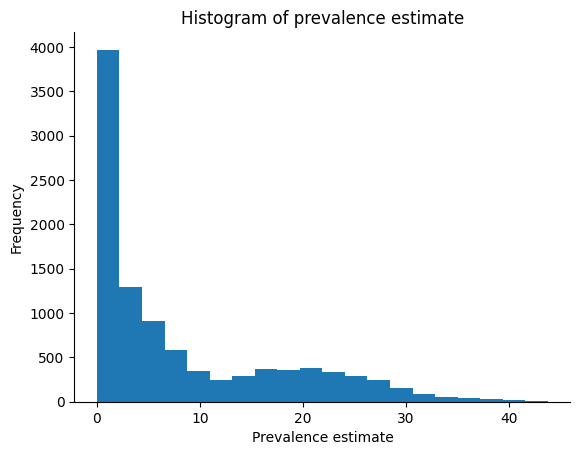

In [11]:
# histogram of prevalence estimate
df_est['data_value'].plot(kind='hist', bins=20, title='data_value')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Histogram of prevalence estimate')
plt.ylabel('Frequency')
plt.xlabel('Prevalence estimate')

There seems two peak in prevalence estimate one around 0-1 and one around 20.

Similarly we can check the distribution of the sampple size being used for the prevalence estimate calcuation. These result can be used to check for significance of estimate as smaller sampple size are not significant.

In [12]:
# histogram of sample size
df_est_json = client.get("qeru-k2y2", select='sample_size', limit=10000)
df_est = pd.DataFrame.from_records(df_est_json)
df_est['sample_size'] = pd.to_numeric(df_est['sample_size'], errors='coerce')
df_est.head()

,sample_size
0,2259
1,101
2,373
3,145
4,827


In [13]:
# summary
df_est.describe()

,sample_size
count,10000.000000
mean,2175.263000
std,14549.286759
min,11.000000
25%,87.000000
50%,304.000000
75%,1055.000000
max,511931.000000


75th percentile value of sample size is 1055 but the maximum value is 511931. It shows there are some large sample size but most of them less than 5000.

Text(0.5, 0, 'Sample size')

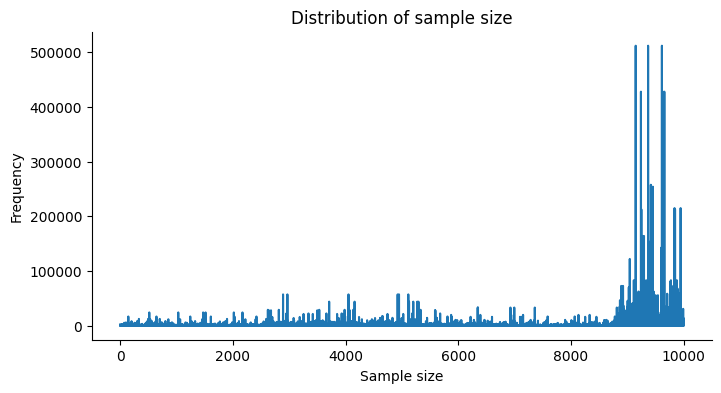

In [14]:
# plot of sample size
df_est['sample_size'].plot(kind='line', figsize=(8, 4), title='sample_size')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title('Distribution of sample size')
plt.ylabel('Frequency')
plt.xlabel('Sample size')

This shows most of the sample size values are of around 9000 to 10000.

# Data aggregations and pivot table
Lets proceed to check the unique values, counts of the categorical variables, contigency tables etc to get more insights about the data:-

## Proportions of data for each categorical variable

In [15]:
# function to get whole data for the user input column and print category count
def prop_category(col_name,filter, lim):
    """(str, str, int) -> pd.DataFrame
    This function takes three argument 'col_name', 'filter' and 'lim'. col_name is the
    name of the column (or variable) which the user want to quiery from the VEHSS data. filter
    takes the filtering user want to apply on any other column and lim takes the number of
    data rows the output category proportion will be based on.
    Then this function fetches data, calculates proportion and returns the result.
    """
    # variable to quiery
    col = [col_name]
    df_res_json = client.get("qeru-k2y2", select=col_name, where=filter, limit=lim)
    df_res = pd.DataFrame.from_records(df_res_json)
    # calculates proportion of each category in provided variable
    df_cat_prop = pd.DataFrame(df_res[col_name].value_counts(normalize=True))
    df_cat_prop.reset_index(inplace=True)
    df_cat_prop.columns = [col_name, 'Proportion']
    return df_cat_prop

Lets check proportions of some of the categorical columns:-

## Gender proportions in the data

In [16]:
# proportions of gender in first 10000 data points
# lets filter for year 2021 to check for only 2021 year
# also lets filter for gender (for male and female only)
df_gender_prop=prop_category(col_name='gender', filter = "yearstart = 2021 AND gender IN ('Male', 'Female')", lim = 10000)
df_gender_prop

,gender,Proportion
0,Male,0.5059
1,Female,0.4941


We can see proportion of males and females are almost same in the data. Lets plot this information on a bar plot.

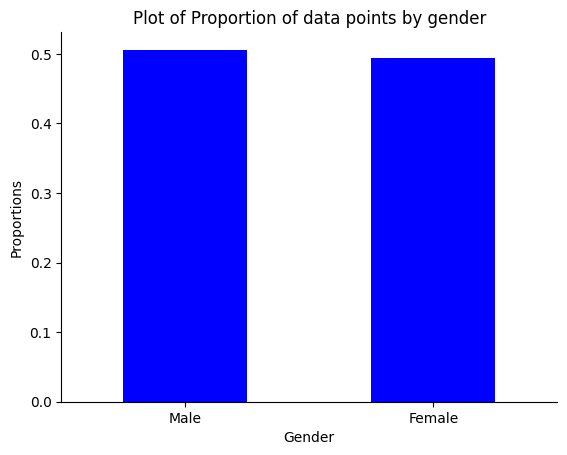

In [17]:
# plot of the gender proportions
df_gender_prop['Proportion'].plot(kind='bar', title='Proportion', color='blue')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.ylabel('Proportions')
plt.xlabel('Gender')
plt.title('Plot of Proportion of data points by gender')
plt.xticks([0,1],df_gender_prop['gender'], rotation=0)
plt.show()

Similarly we can check the proportion for gender for other filter also. Lets check for the year start 2020.

In [18]:
# proportions of gender in first 10000 data points
# lets filter for year 2021 to check for only 2021 year
# also lets filter for gender (for male and female only)
df_gender_prop=prop_category(col_name='gender', filter = "yearstart = 2021 AND gender IN ('Male', 'Female')", lim = 10000)
df_gender_prop

,gender,Proportion
0,Male,0.5059
1,Female,0.4941


We see that there is similar pattern in the proportion.

# Location proportions in the data

In [19]:
# proportions of locations in first 100000 data points
# lets filter for year 2021 to check for only 2021 year
df_loc_prop=prop_category(col_name='locationabbr', filter = "yearstart = 2021", lim = 100000)
df_loc_prop

,locationabbr,Proportion
0,Adams,0.28052
1,Adair,0.08340
2,Albany,0.06861
3,AL,0.04680
4,AK,0.04680
5,Alameda,0.04588
6,Alachua,0.04208
7,Alamance,0.03973
8,Ada,0.03968
9,Aiken,0.03943


We can see the above 20 county data are contained in the first 100000 data points. Difference in proportion shows county are repeated with differing number of repetitions.

# Proportion of category

In [20]:
# proportions of topic in first 100000 data points
# lets filter for year 2021 to check for only 2021 year
df_loc_prop=prop_category(col_name='question', filter = "yearstart = 2021", lim = 100000)
df_loc_prop

,question,Proportion
0,"Prevalence of Diabetic Retinopathy, by detaile...",0.71348
1,Prevalence of Diabetic Retinopathy,0.28652


In [21]:
# proportions of topic in first 100000 data points
# lets filter for year 2021 to check for only 2020 year
df_loc_prop=prop_category(col_name='question', filter = "yearstart = 2019", lim = 100000)
df_loc_prop

,question,Proportion
0,"Prevalence of AMD, by vision threatening statu...",0.45964
1,"Prevalence of AMD, by detailed age groups",0.23639
2,"Prevalence of AMD, by vision threatening status",0.20097
3,Prevalence of AMD,0.10300


The study which started in 2019 have data for four questions.

## Average Prevalence estimate for categorical variable
In this section lets check prevalence estimate for categorical variables. Lets define a function for calculating average prevalence estimate for categorical variables.

In [22]:
# function to calculate average prevalence estimate for categorical variables
def avg_prev_est(col_cat, filter, lim):
    """(str, str)->pd.dataframe
    This function takes three parameters col_cat, filter and lim. col_cat is the categorical variable
    for which user want to find the average prevalence rate. filter is the filtering user want to apply.
    lim is the number of data point which user can specify to estimate the average prevalence rate.
    """
    # user provided column and data_value column
    # data_value column contains the estimate of prevalence rate.
    cols = f"{col_cat}, data_value"
    # fetching data using client object and passing the required parameters
    df_prev_json = client.get("qeru-k2y2", select=cols, where=filter, limit=lim)
    df_prev = pd.DataFrame.from_records(df_prev_json)
    # converting dat_value column into numeric format
    # data_value are originally in object format
    df_prev['data_value'] = pd.to_numeric(df_prev['data_value'], errors='coerce')
    df_res = pd.DataFrame(df_prev.groupby(col_cat)['data_value'].mean().reset_index())
    return df_res

Now lets check the average estimate for some of the categorical variables.

In [23]:
# average prevalence rate for gender
# for the study started in 2021
df_prev_gen=avg_prev_est(col_cat='gender', filter = "yearstart = 2021 AND data_value_type = 'Adjusted Prevalence' AND gender IN ('Male','Female')", lim=100000)
df_prev_gen

,gender,data_value
0,Female,7.099327
1,Male,8.919244


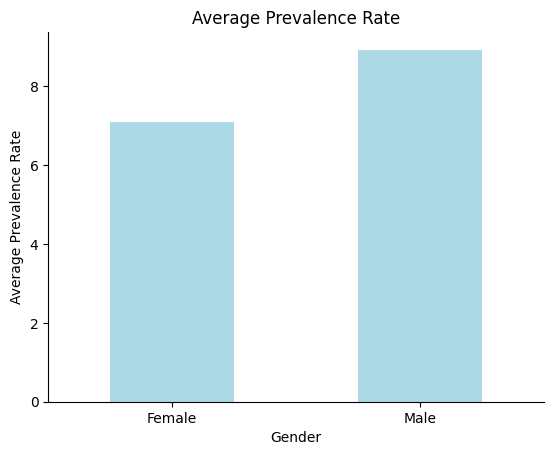

In [24]:
# plot of the average prevalence by gender
df_prev_gen['data_value'].plot(kind='bar', title='Plot of Average Prevalence Rate', color='lightblue')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.ylabel('Average Prevalence Rate')
plt.xlabel('Gender')
plt.title('Average Prevalence Rate')
plt.xticks([0,1],df_prev_gen['gender'], rotation=0)
plt.show()

In [25]:
# average prevalence rate for gender
# for the study started in 2019
df_prev_gen=avg_prev_est(col_cat='gender', filter = "yearstart = 2019 AND data_value_type = 'Adjusted Prevalence' AND gender IN ('Male','Female')", lim=100000)
df_prev_gen

,gender,data_value
0,Female,10.990007
1,Male,12.266055


We see Average adjusted prevalence was more greater in 2019 than in 2021 in females. Also males had higher average adjusted prevalence rate in 2019.

Now lets check for the similar pattern in question,

In [26]:
# average prevalence rate for question
# for study which started in 2021
df=avg_prev_est(col_cat='question', filter = "yearstart = 2021 AND data_value_type = 'Adjusted Prevalence' AND gender IN ('Male','Female')", lim=1000000)
df

,question,data_value
0,Prevalence of Diabetic Retinopathy,8.312175
1,"Prevalence of Diabetic Retinopathy, by detaile...",7.648262


In [27]:
# average prevalence rate for question
# for study which started in 2019
df=avg_prev_est(col_cat='question', filter = "yearstart = 2019 AND data_value_type = 'Adjusted Prevalence' AND gender IN ('Male','Female')", lim=1000000)
df

,question,data_value
0,Prevalence of AMD,17.119070
1,"Prevalence of AMD, by detailed age groups",17.192852
2,"Prevalence of AMD, by vision threatening status",8.666622
3,"Prevalence of AMD, by vision threatening statu...",8.754887


In [28]:
# average prevalence rate for question
# for study which started in 2017
df_prev_gen=avg_prev_est(col_cat='question', filter = "yearstart = 2017 AND data_value_type = 'Adjusted Prevalence' AND gender IN ('Male','Female')", lim=100000)
df_prev_gen

,question,data_value
0,"Prevalence of Blindness, by detailed age groups",0.628073
1,"Prevalence of Blindness, by major age groups",0.866623
2,"Prevalence of Vision Loss, by detailed age groups",3.767577
3,"Prevalence of Vision Loss, by major age groups",4.618672


Question data for 2017, 2019 and 2021 has different set of categories.

Now lets check the average prevalence for different start year,

In [29]:
# average prevalence rate for question
# for study which started in 2021
df1=avg_prev_est(col_cat='yearstart', filter = "yearstart = 2021 AND data_value_type = 'Adjusted Prevalence' AND gender IN ('Male','Female')", lim=10000000)
df1

,yearstart,data_value
0,2021,7.944473


In [30]:
# average prevalence rate for question
# for study which started in 2019
df2=avg_prev_est(col_cat='yearstart', filter = "yearstart = 2019 AND data_value_type = 'Adjusted Prevalence' AND gender IN ('Male','Female')", lim=1000000)
df2

,yearstart,data_value
0,2019,11.597132


In [31]:
# average prevalence rate for question
# for study which started in 2017
df3=avg_prev_est(col_cat='yearstart', filter = "yearstart = 2017 AND data_value_type = 'Adjusted Prevalence' AND gender IN ('Male','Female')", lim=1000000)
df3

,yearstart,data_value
0,2017,2.372845


We see that average adjusted prevalence was least in 2017, it increased in 2019 and later decreased in 2021. Lets plot this finding on a line plot,

In [32]:
# combined dataframe of average adjusted prevalence per year
df = pd.concat([df3, df2, df1], axis = 0)
df

,yearstart,data_value
0,2017,2.372845
0,2019,11.597132
0,2021,7.944473


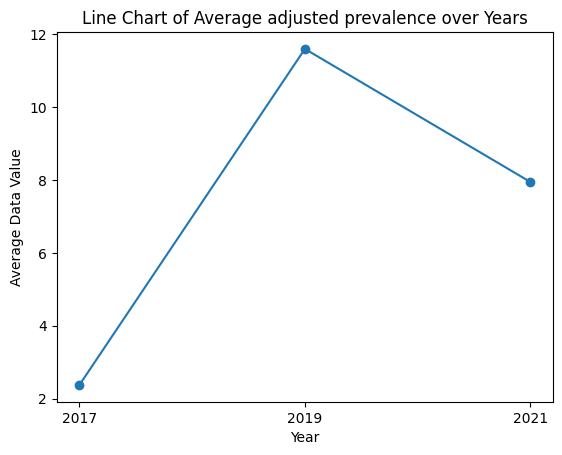

In [33]:
# Plotting the line chart
plt.plot(df['yearstart'], df['data_value'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Average Data Value')
plt.title('Line Chart of Average adjusted prevalence over Years')
plt.show()

## Pivot tables

Now lets check the average adjusted prevalence using pivot table. Here we will use two categorical variables.

In [34]:
# function to print pivot table of average adjusted prevalence
# taking two categorical variables
def avg_prev_est2(col_cat1, col_cat2, filter, lim):
    """(str, str, str, int)->None
    This function takes four parameters col_cat1, col_cat2, filter, and lim. col_cat1 and col_cat2
    are the two categorical variables for which the user wants to find the average prevalence rate.
    filter is the filtering condition to apply, and lim is the number of data points for estimation.
    """
    cols = f"{col_cat1}, {col_cat2}, data_value"
    # Fetching data using the client object and passing the required parameters
    df_prev_json = client.get("qeru-k2y2", select=cols, where=filter, limit=lim)
    df_prev = pd.DataFrame.from_records(df_prev_json)
    # Converting data_value column into numeric format (originally in object format)
    df_prev['data_value'] = pd.to_numeric(df_prev['data_value'], errors='coerce')
    df_res = df_prev.groupby([col_cat1, col_cat2])['data_value'].mean().reset_index()
    # Printing mean values using a pivot table
    pivot_table = pd.pivot_table(df_res, values='data_value', index=[col_cat1], columns=[col_cat2])
    print(pivot_table)

Lets check average adjusted prevalence by question for male and females.

In [35]:
# pivot table
# average adjusted prevalence
avg_prev_est2(col_cat1='question', col_cat2 = 'gender', filter = "yearstart = 2021 AND data_value_type = 'Adjusted Prevalence' AND gender IN ('Male','Female')", lim=1000000)

gender                                                Female      Male
question                                                              
Prevalence of Diabetic Retinopathy                  7.356163  9.234233
Prevalence of Diabetic Retinopathy, by detailed...  6.707796  8.559730


In [36]:
# pivot table
# average adjusted prevalence
# age and gender
avg_prev_est2(col_cat1='age', col_cat2 = 'gender', filter = "yearstart = 2021 AND data_value_type = 'Adjusted Prevalence' AND gender IN ('Male','Female')", lim=1000000)

gender                 Female       Male
age                                     
0-17 years           0.763811   1.039269
0-4 years            0.033921   0.041429
10-14 years          0.457293   0.613016
15-19 years          1.053588   1.455775
18-39 years          4.485048   5.592861
20-24 years          1.896672   2.636213
25-29 years          2.868328   3.861904
30-34 years          3.966958   5.178404
35-39 years          5.036350   6.402290
40-44 years          6.339729   7.823218
40-64 years          9.149864  11.367752
45-49 years          7.614909   9.489123
5-9 years            0.155579   0.189441
50-54 years          8.863177  11.117988
55-59 years         10.212835  12.818059
60-64 years         10.661830  13.496552
65-69 years         10.799826  13.476110
65-84 years         11.129727  14.035612
70-74 years         11.017314  13.917048
75-79 years         11.903562  15.022760
80-84 years         10.842427  13.911570
85 years and older   7.597897  10.159685
85-89 years     

In [37]:
# pivot table
# average adjusted prevalence
# raceethnicity and gender
avg_prev_est2(col_cat1='raceethnicity', col_cat2 = 'gender', filter = "yearstart = 2021 AND data_value_type = 'Adjusted Prevalence' AND gender IN ('Male','Female')", lim=1000000)

gender                 Female       Male
raceethnicity                           
All races            7.243418   9.019744
Black, non-Hispanic  9.149484  11.546484
Hispanic, any race   6.677342   8.776225
Other                4.847448   6.466836
White, non-Hispanic  6.499340   8.083924


Lets now define a final tool to help the user analyse the VEHSS data,

# Analysis tool

We are done with the primary analysis. in this section I am defining the input, logic and analysis function which is the main objective of this project.

## Input function

In [38]:
# lets define a function to take user input
def get_input():
    """(None)->tuple
    This function gets user input for the type of analysis (from given options), filter condition, and limit.
    Returns a tuple (analysis_choice, filter_condition, limit).
    """
    print("Choose the type of analysis (Choose S.No.):")
    print("1. Proportion of categories")
    print("2. Average prevalence rate for one variable")
    print("3. Average prevalence pivot table for two variables")
    analysis_choice = input("Enter S.No.: ")
    filter_condition = input("Enter the filter condition as SQL(e.g., yearstart = 2021): ")
    limit = int(input("Enter the limit of data points: "))
    return analysis_choice, filter_condition, limit


# logic function

In [39]:
def analysis_logic(analysis_choice, filter_condition, limit):
    """(int, str, int)->None
    This function takes three input. analysis_choice, filter_condition, limit. And performs proportion analysis
    of categories for analysis_choice 1 baased on filter_condition and limit data points. analysis choice 2 do the
    similar thing and prints the average prevalence for a single categorical variables. analysis choice 3 print
    pivot table for the two categorical variable entered.

    """
    if analysis_choice == '1':
        col_name = input("Enter the column name for analysis: ")
        print(prop_category(col_name, filter_condition, limit))
    elif analysis_choice == '2':
        col_cat = input("Enter the categorical variable for analysis: ")
        print(avg_prev_est(col_cat, filter_condition, limit))
    elif analysis_choice == '3':
        col_cat1 = input("Enter the first categorical variable: ")
        col_cat2 = input("Enter the second categorical variable: ")
        avg_prev_est2(col_cat1, col_cat2, filter_condition, limit)
    else:
        print("Invalid choice. Please choose a valid analysis option.")

# Analysis function

In [40]:
def analyse_vehss_data():
    """(None)->None
    This function calls the connection, input, logic functions to help the user analyse the
    VEHSS data.
    """
    # reinitiating the connection
    client = Socrata('data.cdc.gov',
                  '1HVRZjRxpLiF90ERG5n2sTsPv',
                  username="Sahithi.kalapala@slu.edu",
                  password="SahitiSlu1")
    # calling the otehr functions
    analysis_choice, filter_condition, limit = get_input()
    analysis_logic(analysis_choice, filter_condition, limit)

## Calling analysis function

In [42]:
# calling analysis function
# try to input

# 3
# yearstart = 2021
# 10000
# age
# gender

# 2
# yearstart = 2021
# 10000
# age
analyse_vehss_data()

Choose the type of analysis (Choose S.No.):
1. Proportion of categories
2. Average prevalence rate for one variable
3. Average prevalence pivot table for two variables
Enter S.No.: 2
Enter the filter condition as SQL(e.g., yearstart = 2021): yearstart = 2021 
Enter the limit of data points: 1000
Enter the categorical variable for analysis: age
                   age  data_value
0           0-17 years    0.034348
1            0-4 years    0.002308
2          10-14 years    0.053929
3          15-19 years    0.092759
4          18-39 years    5.981176
5          20-24 years    0.233600
6          25-29 years    3.366563
7          30-34 years    5.659091
8          35-39 years    9.092093
9          40-44 years    9.594651
10         40-64 years   12.061618
11         45-49 years   10.043542
12           5-9 years    0.018333
13         50-54 years   12.769756
14         55-59 years   13.014390
15         60-64 years   14.129250
16         65-69 years   15.932273
17         65-84 years  

# Augmenting the tool with disease specific information
Consider the researcher is intrested in some particular vision disease and want to explore the demographic of the individual suffering from that disease and suppose we have data from some other source on individuals, their demographic information and diseae. We can add it data source in the above tool to augment it and provide disease specific information on individual level. So lets proceed with this section.

## glucoma data set

In [43]:
# lets load the glucoma dataset
df_glu = pd.read_csv('https://raw.githubusercontent.com/incribo-inc/glaucoma_detection_dataset/main/glaucoma_dataset.csv')
print(df_glu.head(2))

   Patient ID  Age  Gender Visual Acuity Measurements  \
0       62431   69    Male                 LogMAR 0.1   
1       68125   69  Female                 LogMAR 0.1   

   Intraocular Pressure (IOP)  Cup-to-Disc Ratio (CDR) Family History  \
0                       19.46                     0.42             No   
1                       18.39                     0.72             No   

  Medical History                                   Medication Usage  \
0        Diabetes  Amoxicillin, Lisinopril, Omeprazole, Atorvasta...   
1    Hypertension  Lisinopril, Amoxicillin, Atorvastatin, Ibuprof...   

              Visual Field Test Results  \
0  Sensitivity: 0.54, Specificity: 0.75   
1  Sensitivity: 0.72, Specificity: 0.88   

          Optical Coherence Tomography (OCT) Results  Pachymetry  \
0  RNFL Thickness: 86.48 µm, GCC Thickness: 64.14...      541.51   
1  RNFL Thickness: 96.88 µm, GCC Thickness: 56.48...      552.77   

  Cataract Status Angle Closure Status  \
0         Pres

In [44]:
# data types
df_glu.dtypes

Patient ID                                      int64
Age                                             int64
Gender                                         object
Visual Acuity Measurements                     object
Intraocular Pressure (IOP)                    float64
Cup-to-Disc Ratio (CDR)                       float64
Family History                                 object
Medical History                                object
Medication Usage                               object
Visual Field Test Results                      object
Optical Coherence Tomography (OCT) Results     object
Pachymetry                                    float64
Cataract Status                                object
Angle Closure Status                           object
Visual Symptoms                                object
Diagnosis                                      object
Glaucoma Type                                  object
dtype: object

We can see this data containg demographic information, other health related information and Glucoma Type information.
Lets keep only age, gender and glucoma type information to create a disease specific data set.

In [45]:
# extracting gender, age and glucoma type information
# also lets rename the variables and make age categorical as in VEHSS database
df_glu_req = df_glu.copy()
df_glu_req = df_glu_req[['Age','Gender', 'Glaucoma Type']]
df_glu_req.rename(columns={'Glaucoma Type':'Disease'}, inplace=True)

In [46]:
# converting age into categories as in VEHSS data
# age bins and labels
age_bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
age_labels = ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49',
              '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85-89', '90-94', '95-99']
# Create a new column "age_group" with the categorized age
df_glu_req['Age'] = pd.cut(df_glu_req['Age'], bins=age_bins, labels=age_labels, include_lowest=True)

In [47]:
# head of the transformed data
df_glu_req.head(2)

,Age,Gender,Disease
0,65-69,Male,Primary Open-Angle Glaucoma
1,65-69,Female,Juvenile Glaucoma


## Prevalence of Diabetic Retinopathy Data

In [48]:
# extracting diabetic retinopathy data
df_dia_rat = client.get("qeru-k2y2",
                        select='age, gender, question',
                        where = "question='Prevalence of Diabetic Retinopathy'",
                        limit=100000)
df_dia_rat_req = pd.DataFrame.from_records(df_dia_rat)

In [49]:
# rename columns
df_dia_rat_req.rename(columns={'age':'Age', 'gender':'Gender','question':'Disease'}, inplace=True)
# remove 'years' from age and 'prevalence of' from question
df_dia_rat_req['Age']=df_dia_rat_req['Age'].str.replace(' years','')
df_dia_rat_req['Disease']=df_dia_rat_req['Disease'].str.replace('Prevalence of ','')
df_dia_rat_req.head(2)

,Age,Gender,Disease
0,18-39,All genders,Diabetic Retinopathy
1,All ages,Female,Diabetic Retinopathy


## Prevalence of AMD data

In [50]:
# extracting diabetic retinopathy data
df_amd = client.get("qeru-k2y2",
                        select='age, gender, question',
                        where = "question='Prevalence of AMD'",
                        limit=100000)
df_amd_req = pd.DataFrame.from_records(df_amd)

In [51]:
# rename columns
df_amd_req.rename(columns={'age':'Age', 'gender':'Gender','question':'Disease'}, inplace=True)
# remove 'years' from age and 'prevalence of' from question
df_amd_req['Age']=df_amd_req['Age'].str.replace(' years','')
df_amd_req['Disease']=df_amd_req['Disease'].str.replace('Prevalence of ','')
df_amd_req.head(3)

,Age,Gender,Disease
0,85 and older,Male,AMD
1,40 and older,Female,AMD
2,40-64,Male,AMD


Lets merge all these three disease specific data

## merging disease specific data

### merging glucoma and diabetic retinopathy data

In [52]:
# merging glucoma data and diabetic retinopathy data
# Merge the DataFrames using pd.merge on multiple columns
df_merged1 = pd.merge(df_glu_req, df_dia_rat_req, on=['Age', 'Gender', 'Disease'], how='outer')

### merging merged data and AMD data

In [53]:
# merging glucoma data and diabetic retinopathy data
# Merge the DataFrames using pd.merge on multiple columns
df_merged2 = pd.merge(df_merged1, df_amd_req, on=['Age', 'Gender', 'Disease'], how='outer')

In [54]:
# head of the merged data
df_merged2.head()

,Age,Gender,Disease
0,65-69,Male,Primary Open-Angle Glaucoma
1,65-69,Male,Primary Open-Angle Glaucoma
2,65-69,Male,Primary Open-Angle Glaucoma
3,65-69,Male,Primary Open-Angle Glaucoma
4,65-69,Male,Primary Open-Angle Glaucoma


In [55]:
# tail of the merged data
df_merged2.tail()

,Age,Gender,Disease
209995,85 and older,Female,AMD
209996,85 and older,Female,AMD
209997,85 and older,Female,AMD
209998,85 and older,Female,AMD
209999,85 and older,Female,AMD


We have got our disease specific data prepared.

Now lets create a new function to analyse the disease data.

In [56]:
# function to analyse the disease data
def analyse_disease():
    """(None)->None
    This function when called asks user for disease input which they want to analyse. Then this function
    prints the proportion of categories for the categorical variable for that disease.
    """
    disease_to_analyse = input("Enter the disease to analyze: ")
    variable_to_analyse = input("Enter the variable to analyze: ")
    filtered_data = df_merged2[df_merged2['Disease'] == disease_to_analyse]
    result_df = pd.DataFrame(filtered_data[variable_to_analyse].value_counts(normalize=True).sort_values(ascending=False))
    print(result_df)

In [57]:
# calling the function

#try

# AMD
# age

# AMD
# gender

# Primary Open-Angle Glaucoma
# age

# Diabetic Retinopathy
# age
analyse_disease()

Enter the disease to analyze: AMD
Enter the variable to analyze: Age
                  Age
40 and older  0.28411
40-64         0.27345
65-84         0.25288
85 and older  0.18956
